<a href="https://colab.research.google.com/github/thisisSHAX/ML_Ops_Project-/blob/main/Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=16Pd-BdhzNMzPqPWD6XEu_XFZaGrSqFUz')
df.head()

Case_No  A1  A2  ...  Family_mem_with_ASD  Who completed the test  Class/ASD Traits 
0        1   0   0  ...                   no           family member                 No
1        2   1   1  ...                   no           family member                Yes
2        3   1   0  ...                   no           family member                Yes
3        4   1   1  ...                   no           family member                Yes
4        5   1   1  ...                  yes           family member                Yes

[5 rows x 19 columns]

In [3]:
x_columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_Mons','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']
cat_features = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']
num_features = list(set(x_columns) - set(cat_features))

In [4]:
encoded_df = pd.get_dummies(df[x_columns], columns=cat_features, drop_first = True)
encoded_df.sample(5)

Age_Mons  A1_1  ...  Jaundice_yes  Family_mem_with_ASD_yes
403        24     1  ...             0                        0
623        30     1  ...             0                        0
111        36     0  ...             0                        0
400        35     1  ...             0                        1
313        36     0  ...             0                        0

[5 rows x 24 columns]

In [5]:
x_features = list(encoded_df.columns)

In [6]:
X = encoded_df
Y = pd.get_dummies(df['Class/ASD Traits '], drop_first=True)
#Checking imbalance
Y.sum()/len(Y)

Yes    0.690702
dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
# Splitting
train_X, test_X, train_Y, test_Y = train_test_split(df[x_columns], Y, test_size=0.2, random_state=1)
train_X, prod_X, train_Y, prod_Y = train_test_split(train_X, train_Y, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

# Splitting after One - Hot Encoding
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_prod, Y_train, Y_prod = train_test_split(X_train, Y_train, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [8]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter= 10000)

# fit the model with data
logreg.fit(X_train,Y_train)

#
Y_pred_final=logreg.predict(X_prod)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 257.44, 'Predicted label')

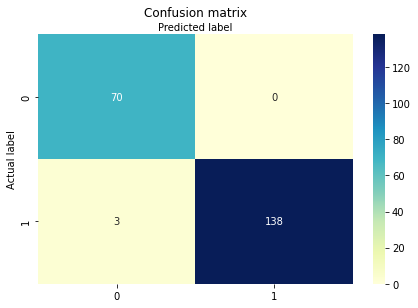

In [9]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_prod, Y_pred_final)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
print("Accuracy:",metrics.accuracy_score(Y_prod, Y_pred_final))
print("Precision:",metrics.precision_score(Y_prod, Y_pred_final))
print("Recall:",metrics.recall_score(Y_prod, Y_pred_final))
print("f1 score:",metrics.f1_score(Y_prod, Y_pred_final))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 0.985781990521327
Precision: 1.0
Recall: 0.9787234042553191
f1 score: 0.989247311827957
Specificity 1.0


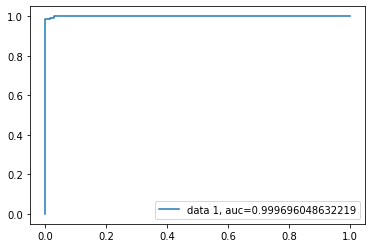

In [11]:
Y_pred_proba_final = logreg.predict_proba(X_prod)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_prod,  Y_pred_proba_final)
auc = metrics.roc_auc_score(Y_prod, Y_pred_proba_final)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [12]:
!pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.7/dist-packages (2.3.0)


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.linear_model import LogisticRegression

In [14]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer1 = OneHotEncoder(drop='first', sparse=False)
categorical_transformer2 = TargetEncoder()

In [15]:
preprocessor1 = ColumnTransformer(transformers=[('num', numeric_transformer, num_features),('cat', categorical_transformer1, cat_features)])
preprocessor2 = ColumnTransformer(transformers=[('num', numeric_transformer, num_features),('cat', categorical_transformer2, cat_features)])

In [16]:
#train_X, test_X, train_Y, test_Y = train_test_split(df[x_columns], Y, test_size=0.2, random_state=1)

#train_X, prod_X, train_Y, prod_Y = train_test_split(train_X, train_Y, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [17]:
clf1 = Pipeline(steps=[("preprocessor", preprocessor1),("classifier", LogisticRegression(random_state=100))])
clf1.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_Mons']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['A1', 'A2', 'A3', 'A4', 'A5',
                                                   'A6', 'A7', 'A8', 'A9',
                                                   'A10', 'Sex', 'Ethnicity',
                                                   'Jaundice',
                                                   'Family_mem_with_ASD'])])),
                ('classifier', LogisticRegression(random_state=100))])

In [18]:
clf2 = Pipeline(steps=[("preprocessor", preprocessor2),("classifier", LogisticRegression(random_state=100))])
clf2.fit(train_X, train_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age_Mons']),
                                                 ('cat', TargetEncoder(),
                                                  ['A1', 'A2', 'A3', 'A4', 'A5',
                                                   'A6', 'A7', 'A8', 'A9',
                                                   'A10', 'Sex', 'Ethnicity',
                                                   'Jaundice',
                                                   'Family_mem_with_ASD'])])),
                ('classifier', LogisticRegression(random_state=100))])

## Monitoring

In [19]:
!pip install wandb

In [20]:
import wandb
wandb.login()

wandb: Currently logged in as: thisisshax (use `wandb login --relogin` to force relogin)


True

In [21]:
import os

In [22]:
os.environ["WANDB_API_KEY"] = "26ff855733a63e9d999357d3e3bd1eb135cff5a5"

In [23]:
def run_model_experiment(model,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         name,
                         config = None,
                         tags = None):
  
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  y_probas = model.predict_proba(x_test)
  features = x_train.columns

  wandb.init(project='AutismScreening', config=config, tags = tags)
  wandb.run.name = name

  acc = metrics.accuracy_score(y_test, model.predict(x_test))
  prec = metrics.precision_score(y_test, model.predict(x_test))
  rec = metrics.recall_score(y_test, model.predict(x_test))
  f1 = metrics.f1_score(y_test, model.predict(x_test))
  
  #rmse = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
  #r2 = model.score(x_test, y_test)

  wandb.log( {"Accuracy" : acc, 
              "Precision": prec,
              "Recall": rec,
              "F1 score" : f1} )
  
  wandb.sklearn.plot_classifier(model, x_train, x_test, y_train, y_test, 
                                y_pred, y_probas, features, model_name=name)
 
  #wandb.sklearn.plot_regressor(model, 
  #                             x_train, 
  #                             x_test, 
  #                             y_train, 
  #                             y_test,  
  #                             model_name=name)
  
  wandb.Artifact(name, 
                 type = 'model',
                 description = config)

  wandb.save()
  wandb.finish()

  return model

In [24]:
prod_model = run_model_experiment(clf1,
                                   train_X,
                                   train_Y,
                                   prod_X,
                                   prod_Y,
                                   name = 'ProductionModelLogReg',
                                   tags = ['Production'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


wandb: 
wandb: Plotting ProductionModelLogReg.
wandb: WARNING could not find any of attributes feature_importances_, feature_log_prob_, coef_ on classifier. Cannot plot feature importances.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: ERROR X contains values that are not numbers. Please vectorize, label encode or one hot encode X and call the plotting function again.
wandb: ERROR X_test contains values that are not numbers. Please vectorize, label encode or one hot encode X_test and call the plotting function again.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: ERROR X contains values that are not numbers. Please vectorize, label encode or one hot encode X and call the plotting function again.
wandb: Logged calibration curve.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.
wandb: WARNING Calling run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


In [25]:
api = wandb.Api()

all_runs = api.runs("thisisshax/AutismScreening", order="+summary_metrics.Accuracy")

for run in all_runs:
  print(f"Model Name: {run.name} and Accuracy {run.summary.get('Accuracy')}")
  print(run.config)

Model Name: DecisionTree and Accuracy 0.8909952606635071
{}
Model Name: KNNModel and Accuracy 0.919431279620853
{}
Model Name: ProductionModelLogReg and Accuracy 0.981042654028436
{}
Model Name: ProductionModelLogReg and Accuracy 0.981042654028436
{}
Model Name: ProductionModelLogReg and Accuracy 0.981042654028436
{}
Model Name: LogisticRegressionModel and Accuracy 1
{}


In [26]:
#Running on production set
pred_final_y = clf1.predict(prod_X)

Text(0.5, 257.44, 'Predicted label')

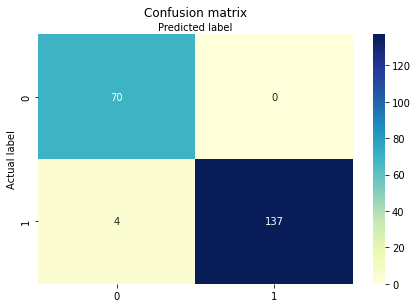

In [27]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(prod_Y, pred_final_y)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
print("Accuracy:",metrics.accuracy_score(prod_Y, pred_final_y))
print("Precision:",metrics.precision_score(prod_Y, pred_final_y))
print("Recall:",metrics.recall_score(prod_Y, pred_final_y))
print("f1 score:",metrics.f1_score(prod_Y, pred_final_y))
print("Specificity", cnf_matrix.ravel()[0]/(cnf_matrix.ravel()[0]+cnf_matrix.ravel()[1]))

Accuracy: 0.981042654028436
Precision: 1.0
Recall: 0.9716312056737588
f1 score: 0.9856115107913669
Specificity 1.0


### Model Explanation

In [29]:
new_cat_features = list(clf1['preprocessor'].transformers_[1][1].get_feature_names())
new_cat_features

['x0_1',
 'x1_1',
 'x2_1',
 'x3_1',
 'x4_1',
 'x5_1',
 'x6_1',
 'x7_1',
 'x8_1',
 'x9_1',
 'x10_m',
 'x11_Latino',
 'x11_Native Indian',
 'x11_Others',
 'x11_Pacifica',
 'x11_White European',
 'x11_asian',
 'x11_black',
 'x11_middle eastern',
 'x11_mixed',
 'x11_south asian',
 'x12_yes',
 'x13_yes']

In [30]:
len(num_features + new_cat_features)

24

In [31]:
!pip install eli5

In [32]:
import eli5.sklearn

In [33]:
eli5.explain_weights( 
    logreg, 
    feature_names = x_features)

Explanation(estimator='LogisticRegression(max_iter=10000)', description="\nFeatures with largest coefficients.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='A2_1', weight=2.658815883512459, std=None, value=None), FeatureWeight(feature='A9_1', weight=2.5950016815136276, std=None, value=None), FeatureWeight(feature='A4_1', weight=2.3081375789461833, std=None, value=None), FeatureWeight(feature='A7_1', weight=2.260001238108098, std=None, value=None), FeatureWeight(feature='A8_1', weight=2.1785707518806627, std=None, value=None), FeatureWeight(feature='A5_1', weight=2.178118250962357, std=None, value=None), FeatureWeight(feature='A6_1', weight=2.1128828413871235, std=None, value=None), FeatureWeight(feature='A1_1', weight=2.039624894887394, std=None, value=None), FeatureWeight(feature='A10_1', weight=2.0306238306549202, std=None, value=None), FeatureWeight(feature='A3_1', weight=1.2570376600709556, std=None, value=None), FeatureWeight(feature='Jaundice_yes', weight=0.6614007387527685, std=None, value=None), FeatureWeight(feature='Ethnicity_Others', weight=0.5235884437003631, std=None, value=None), FeatureWeight(feature='Ethnicity_asian', weight=0.24731712983202567, std=None, value=None), FeatureWeight(feature='Ethnicity_Pacifica', weight=0.19656088757420756, std=None, value=None)], neg=[FeatureWeight(feature='<BIAS>', weight=-8.156638482619423, std=None, value=None), FeatureWeight(feature='Ethnicity_middle eastern', weight=-0.36547137155218556, std=None, value=None), FeatureWeight(feature='Ethnicity_black', weight=-0.2909842511803257, std=None, value=None), FeatureWeight(feature='Ethnicity_White European', weight=-0.22832581988269432, std=None, value=None), FeatureWeight(feature='Family_mem_with_ASD_yes', weight=-0.21517828589206076, std=None, value=None), FeatureWeight(feature='Ethnicity_mixed', weight=-0.1914438400383017, std=None, value=None)], pos_remaining=3, neg_remaining=2), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [34]:
#Explaining for an Autistic person
X_test.iloc[0]

Age_Mons                    36
A1_1                         1
A2_1                         0
A3_1                         1
A4_1                         1
A5_1                         1
A6_1                         1
A7_1                         1
A8_1                         1
A9_1                         1
A10_1                        1
Sex_m                        1
Ethnicity_Latino             1
Ethnicity_Native Indian      0
Ethnicity_Others             0
Ethnicity_Pacifica           0
Ethnicity_White European     0
Ethnicity_asian              0
Ethnicity_black              0
Ethnicity_middle eastern     0
Ethnicity_mixed              0
Ethnicity_south asian        0
Jaundice_yes                 0
Family_mem_with_ASD_yes      0
Name: 339, dtype: int64

In [35]:
Y_test.iloc[0]

Yes    1
Name: 339, dtype: uint8

In [36]:
eli5.explain_prediction( logreg,
                         X_test.iloc[0],
                         target_names = ['No Autism', 'Autism'] )

Explanation(estimator='LogisticRegression(max_iter=10000)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='Autism', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='A9_1', weight=2.5950016815136276, std=None, value=1.0), FeatureWeight(feature='A4_1', weight=2.3081375789461833, std=None, value=1.0), FeatureWeight(feature='A7_1', weight=2.260001238108098, std=None, value=1.0), FeatureWeight(feature='A8_1', weight=2.1785707518806627, std=None, value=1.0), FeatureWeight(feature='A5_1', weight=2.178118250962357, std=None, value=1.0), FeatureWeight(feature='A6_1', weight=2.1128828413871235, std=None, value=1.0), FeatureWeight(feature='A1_1', weight=2.039624894887394, std=None, value=1.0), FeatureWeight(feature='A10_1', weight=2.0306238306549202, std=None, value=1.0), FeatureWeight(feature='A3_1', weight=1.2570376600709556, std=None, value=1.0), FeatureWeight(feature='Age_Mons', weight=0.587334404899394, std=None, value=36.0), FeatureWeight(feature='Ethnicity_Latino', weight=0.08726720906837616, std=None, value=1.0)], neg=[FeatureWeight(feature='<BIAS>', weight=-8.156638482619423, std=None, value=1.0), FeatureWeight(feature='Sex_m', weight=-0.049936354284346514, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.9999891140369421, score=11.428025505475324, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [37]:
#Explaining for an Non-Autistic person
Y_test.head()

Yes
339    1
248    1
664    0
310    1
85     1

In [38]:
eli5.explain_prediction( logreg,
                         X_test.iloc[2],
                         target_names = ['No Autism', 'Autism'] )

Explanation(estimator='LogisticRegression(max_iter=10000)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='No Autism', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=8.156638482619423, std=None, value=1.0), FeatureWeight(feature='Sex_m', weight=0.049936354284346514, std=None, value=1.0)], neg=[FeatureWeight(feature='A6_1', weight=-2.1128828413871235, std=None, value=1.0), FeatureWeight(feature='A10_1', weight=-2.0306238306549202, std=None, value=1.0), FeatureWeight(feature='Age_Mons', weight=-0.4894453374161617, std=None, value=30.0), FeatureWeight(feature='Ethnicity_asian', weight=-0.24731712983202567, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.9653203078873285, score=-3.326305697613538, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

### Partial Dependency Plots

In [39]:
from sklearn.inspection import PartialDependenceDisplay

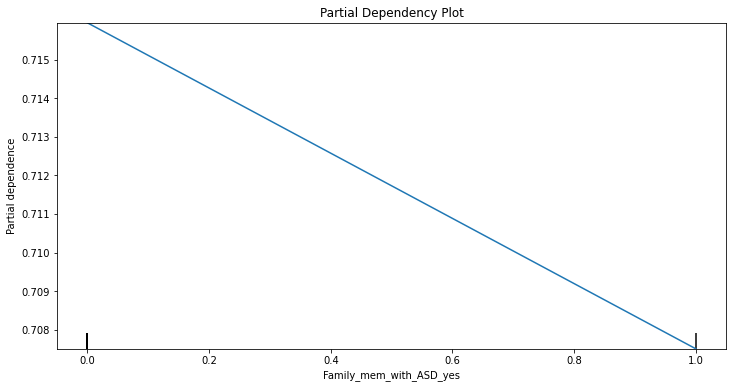

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(logreg,
                                        X_test,
                                        features = ['Family_mem_with_ASD_yes'],
                                        feature_names = x_features,
                                        ax = ax);

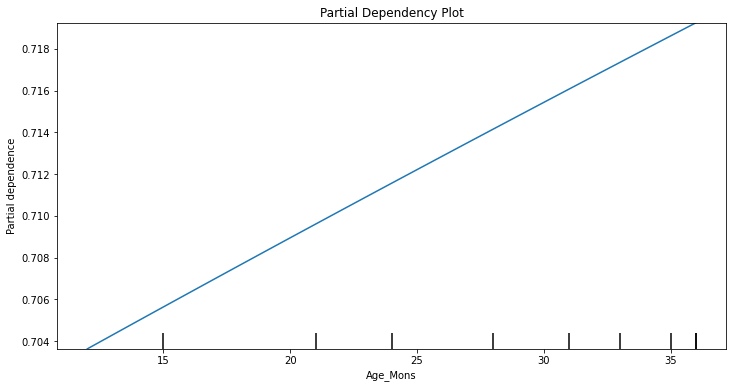

In [41]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Partial Dependency Plot")
PartialDependenceDisplay.from_estimator(logreg,
                                        X_test,
                                        features = ['Age_Mons'],
                                        feature_names = x_features,
                                        ax = ax);

### LIME

In [42]:
!pip install lime

In [43]:
import lime
import lime.lime_tabular

In [44]:
explainer = (lime
             .lime_tabular
             .LimeTabularExplainer(training_data = X_train.to_numpy(), 
                                   training_labels = Y_train,                                   
                                   feature_names = x_features, 
                                   class_names = ['No Autism', 'Autism'],
                                   categorical_features = ['Family_mem_with_ASD_yes'],
                                   categorical_names = ['Family_mem_with_ASD_yes'], 
                                   kernel_width=3,
                                   verbose = True ))

In [45]:
exp = explainer.explain_instance( X_test.iloc[0].to_numpy(), 
                                  logreg.predict_proba )

Intercept 0.29411111943932833
Prediction_local [1.28929107]
Right: 0.9999891140369421


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [46]:
exp.show_in_notebook(show_table=True, show_all=False)

In [47]:
exp = explainer.explain_instance( X_test.iloc[2].to_numpy(), 
                                  logreg.predict_proba )

Intercept 1.216313749822311
Prediction_local [0.35300095]
Right: 0.03467969211267155


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [48]:
exp.show_in_notebook(show_table=True, show_all=False)

### Shapley Values

In [49]:
!pip install shap

In [50]:
import shap

In [51]:
row_to_show = 3
data_for_prediction = X_prod.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
logreg.predict_proba(data_for_prediction_array)

X does not have valid feature names, but LogisticRegression was fitted with feature names


array([[0.59023039, 0.40976961]])

In [52]:
masker = shap.maskers.Independent(data=data_for_prediction_array)

#explainer = shap.LinearExplainer(logreg, data_for_prediction_array, feature_perturbation="interventional")
explainer = shap.LinearExplainer(logreg, masker=masker)

shap_values = explainer.shap_values(data_for_prediction_array)

In [53]:
shap_values

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
         0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.]])

In [54]:
shap.initjs()
shap.force_plot( explainer.expected_value, 
                 shap_values, 
                 data_for_prediction_array,
                 figsize=(20, 2) )

### Global Explanation of SHAP

In [55]:
explainer = masker = shap.maskers.Independent(data=X_train)

#explainer = shap.LinearExplainer(logreg, data_for_prediction_array, feature_perturbation="interventional")
explainer = shap.LinearExplainer(logreg, masker=masker)

shap_values = explainer.shap_values(X_train)

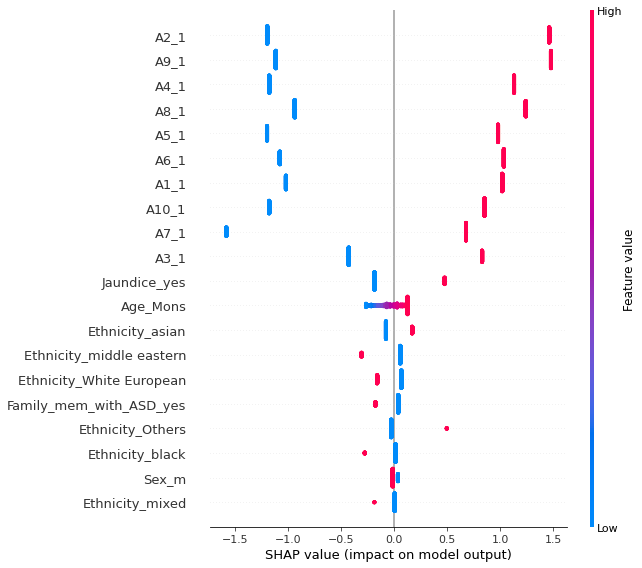

In [56]:
shap.summary_plot(shap_values, X_train, plot_type = 'dot' )

In [57]:
explainer.expected_value

3.2843711361604644

In [58]:
shap.initjs()
shap.force_plot( explainer.expected_value, 
                 shap_values, 
                 X_train )

### Individual Conditional Expectations (ICE)

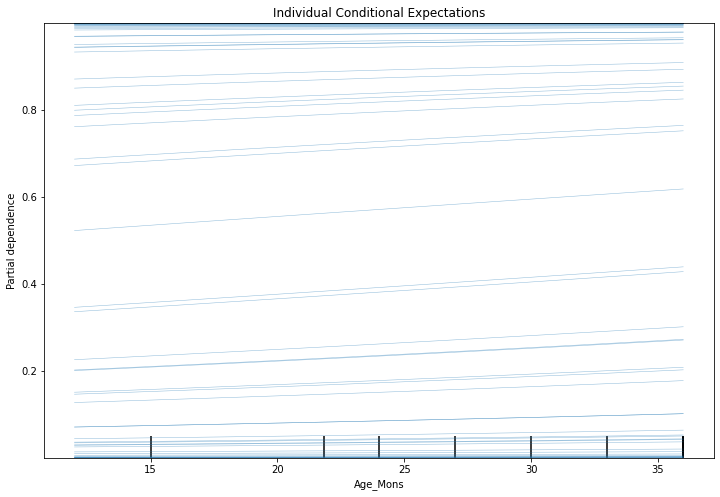

In [59]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    logreg,
    X_train,
    features=["Age_Mons"],
    kind="individual",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    ax = ax
)

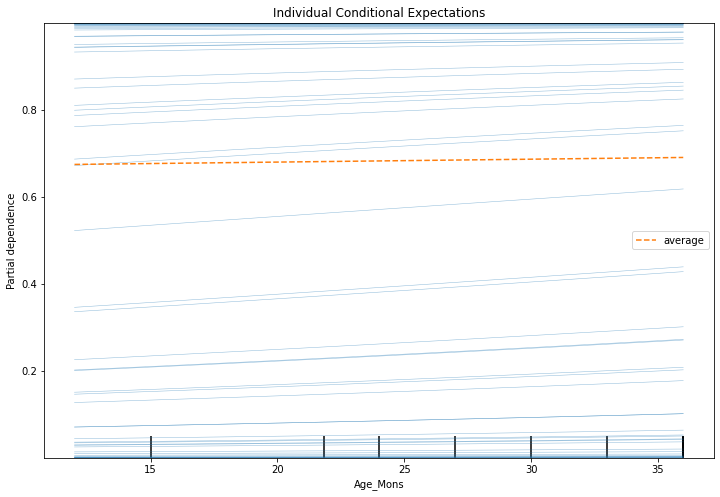

In [60]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Individual Conditional Expectations")

display = PartialDependenceDisplay.from_estimator(
    logreg,
    X_train,
    features=["Age_Mons"],
    kind="both",
    subsample=100,
    n_jobs=3,
    grid_resolution=20,
    random_state=0,
    ice_lines_kw={"color": "tab:blue", "alpha": 0.5, "linewidth": 0.5},
    pd_line_kw={"color": "tab:orange", "linestyle": "--"},
    ax = ax
)

###Model Drift


In [61]:
new_cat_features = list(clf1['preprocessor'].transformers_[1][1].get_feature_names())
new_cat_features

['x0_1',
 'x1_1',
 'x2_1',
 'x3_1',
 'x4_1',
 'x5_1',
 'x6_1',
 'x7_1',
 'x8_1',
 'x9_1',
 'x10_m',
 'x11_Latino',
 'x11_Native Indian',
 'x11_Others',
 'x11_Pacifica',
 'x11_White European',
 'x11_asian',
 'x11_black',
 'x11_middle eastern',
 'x11_mixed',
 'x11_south asian',
 'x12_yes',
 'x13_yes']

In [62]:
len(num_features + new_cat_features)

24

In [63]:
prod_X

A1  A2  A3  A4  ...  Sex       Ethnicity  Jaundice  Family_mem_with_ASD
431   0   1   0   0  ...    f           asian       yes                   no
778   0   0   1   0  ...    f           asian        no                   no
806   1   1   0   0  ...    m  White European        no                  yes
263   1   0   1   1  ...    m  middle eastern        no                   no
663   1   0   0   0  ...    m           asian       yes                   no
..   ..  ..  ..  ..  ...  ...             ...       ...                  ...
353   1   0   1   1  ...    m           asian        no                   no
706   1   0   0   1  ...    m  White European       yes                  yes
522   1   1   1   1  ...    m           black       yes                   no
16    0   0   0   0  ...    m  middle eastern        no                  yes
140   1   1   1   1  ...    m     south asian        no                   no

[211 rows x 15 columns]

Preparing Production Data

In [64]:
prod_X = prod_X.reset_index()
prod_X

index  A1  A2  A3  ...  Sex       Ethnicity  Jaundice  Family_mem_with_ASD
0      431   0   1   0  ...    f           asian       yes                   no
1      778   0   0   1  ...    f           asian        no                   no
2      806   1   1   0  ...    m  White European        no                  yes
3      263   1   0   1  ...    m  middle eastern        no                   no
4      663   1   0   0  ...    m           asian       yes                   no
..     ...  ..  ..  ..  ...  ...             ...       ...                  ...
206    353   1   0   1  ...    m           asian        no                   no
207    706   1   0   0  ...    m  White European       yes                  yes
208    522   1   1   1  ...    m           black       yes                   no
209     16   0   0   0  ...    m  middle eastern        no                  yes
210    140   1   1   1  ...    m     south asian        no                   no

[211 rows x 16 columns]

In [65]:
prod_X_cols = clf1.named_steps['preprocessor'].transform(prod_X[x_columns])
prod_X_cols

array([[ 0.88057225,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.75266564,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00847886,  1.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.52640047,  1.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.00847886,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.65430708,  1.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

In [66]:
prod_X_cols_df = pd.DataFrame(prod_X_cols, columns  = num_features + new_cat_features)
prod_X_cols_df

Age_Mons  x0_1  x1_1  x2_1  ...  x11_mixed  x11_south asian  x12_yes  x13_yes
0    0.880572   0.0   1.0   0.0  ...        0.0              0.0      1.0      0.0
1    0.752666   0.0   0.0   1.0  ...        0.0              0.0      0.0      0.0
2    1.008479   1.0   1.0   0.0  ...        0.0              0.0      0.0      1.0
3    0.241039   1.0   0.0   1.0  ...        0.0              0.0      0.0      0.0
4   -1.805467   1.0   0.0   0.0  ...        0.0              0.0      1.0      0.0
..        ...   ...   ...   ...  ...        ...              ...      ...      ...
206  0.752666   1.0   0.0   1.0  ...        0.0              0.0      0.0      0.0
207 -0.526400   1.0   0.0   0.0  ...        0.0              0.0      1.0      1.0
208 -0.526400   1.0   1.0   1.0  ...        0.0              0.0      1.0      0.0
209  1.008479   0.0   0.0   0.0  ...        0.0              0.0      0.0      1.0
210 -0.654307   1.0   1.0   1.0  ...        0.0              1.0      0.0      0.0

[211 rows x 24 columns]

In [67]:
prod_X_cols_df_final = pd.concat([prod_X[num_features], prod_X_cols_df[new_cat_features]], axis = 1)
prod_X_cols_df_final

Age_Mons  x0_1  x1_1  x2_1  ...  x11_mixed  x11_south asian  x12_yes  x13_yes
0          35   0.0   1.0   0.0  ...        0.0              0.0      1.0      0.0
1          34   0.0   0.0   1.0  ...        0.0              0.0      0.0      0.0
2          36   1.0   1.0   0.0  ...        0.0              0.0      0.0      1.0
3          30   1.0   0.0   1.0  ...        0.0              0.0      0.0      0.0
4          14   1.0   0.0   0.0  ...        0.0              0.0      1.0      0.0
..        ...   ...   ...   ...  ...        ...              ...      ...      ...
206        34   1.0   0.0   1.0  ...        0.0              0.0      0.0      0.0
207        24   1.0   0.0   0.0  ...        0.0              0.0      1.0      1.0
208        24   1.0   1.0   1.0  ...        0.0              0.0      1.0      0.0
209        36   0.0   0.0   0.0  ...        0.0              0.0      0.0      1.0
210        23   1.0   1.0   1.0  ...        0.0              1.0      0.0      0.0

[211 rows x 24 columns]

In [68]:
prod_X_cols_df_final['prediction'] = clf1.predict(prod_X[x_columns])
prod_X_cols_df_final

Age_Mons  x0_1  x1_1  x2_1  ...  x11_south asian  x12_yes  x13_yes  prediction
0          35   0.0   1.0   0.0  ...              0.0      1.0      0.0           0
1          34   0.0   0.0   1.0  ...              0.0      0.0      0.0           1
2          36   1.0   1.0   0.0  ...              0.0      0.0      1.0           1
3          30   1.0   0.0   1.0  ...              0.0      0.0      0.0           0
4          14   1.0   0.0   0.0  ...              0.0      1.0      0.0           1
..        ...   ...   ...   ...  ...              ...      ...      ...         ...
206        34   1.0   0.0   1.0  ...              0.0      0.0      0.0           1
207        24   1.0   0.0   0.0  ...              0.0      1.0      1.0           1
208        24   1.0   1.0   1.0  ...              0.0      1.0      0.0           1
209        36   0.0   0.0   0.0  ...              0.0      0.0      1.0           0
210        23   1.0   1.0   1.0  ...              1.0      0.0      0.0           1

[211 rows x 25 columns]

In [69]:
train_X

A1  A2  A3  A4  ...  Sex       Ethnicity  Jaundice  Family_mem_with_ASD
462    1   1   1   1  ...    m           asian        no                   no
852    1   1   0   1  ...    m           black       yes                  yes
1010   0   1   1   1  ...    m          Latino        no                   no
296    1   0   0   0  ...    m  White European        no                   no
573    0   0   1   1  ...    f  White European       yes                   no
...   ..  ..  ..  ..  ...  ...             ...       ...                  ...
300    1   1   0   1  ...    f  White European        no                   no
787    0   0   0   1  ...    m           asian        no                   no
637    0   0   0   0  ...    f           asian        no                   no
624    1   1   0   0  ...    m  White European        no                   no
66     0   0   0   0  ...    f  middle eastern       yes                   no

[632 rows x 15 columns]

In [70]:
train_x_new = train_X.reset_index()
train_x_cols = clf1.named_steps['preprocessor'].transform(train_x_new)
train_x_cols_df = pd.DataFrame(train_x_cols, columns  = num_features + new_cat_features)
train_x_cols_df_final = pd.concat([train_x_new[num_features], train_x_cols_df[new_cat_features]], axis = 1)
train_x_cols_df_final['prediction'] = clf1.predict(train_X[x_columns])
train_x_cols_df_final['Class/ASD Traits'] = np.array(Y_train)
train_x_cols_df_final

Age_Mons  x0_1  x1_1  x2_1  ...  x12_yes  x13_yes  prediction  Class/ASD Traits
0          19   1.0   1.0   1.0  ...      0.0      0.0           1                 1
1          18   1.0   1.0   0.0  ...      1.0      1.0           1                 1
2          30   0.0   1.0   1.0  ...      0.0      0.0           1                 1
3          33   1.0   0.0   0.0  ...      0.0      0.0           0                 0
4          32   0.0   0.0   1.0  ...      1.0      0.0           1                 1
..        ...   ...   ...   ...  ...      ...      ...         ...               ...
627        18   1.0   1.0   0.0  ...      0.0      0.0           1                 1
628        36   0.0   0.0   0.0  ...      0.0      0.0           1                 1
629        36   0.0   0.0   0.0  ...      0.0      0.0           0                 0
630        27   1.0   1.0   0.0  ...      0.0      0.0           1                 1
631        36   0.0   0.0   0.0  ...      1.0      0.0           1                 1

[632 rows x 26 columns]

In [71]:
!pip install evidently

  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Using cached statsmodels-0.12.2-cp37-cp37m-manylinux1_x86_64.whl (9.5 MB)
  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.1
    Uninstalling statsmodels-0.13.1:
      Successfully uninstalled statsmodels-0.13.1
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-re

In [72]:
!pip install statsmodels --upgrade
!pip install pyyaml==5.4.1
from evidently.dashboard import Dashboard
from evidently.tabs import DataDriftTab, NumTargetDriftTab

from evidently.model_profile import Profile
from evidently.profile_sections import DataDriftProfileSection

  Using cached statsmodels-0.13.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

evidently 0.1.31.dev0 requires statsmodels~=0.12.2, but you'll have statsmodels 0.13.1 which is incompatible.


  Using cached PyYAML-5.4.1-cp37-cp37m-manylinux1_x86_64.whl (636 kB)
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

evidently 0.1.31.dev0 requires PyYAML~=6.0, but you'll have pyyaml 5.4.1 which is incompatible.
evidently 0.1.31.dev0 requires statsmodels~=0.12.2, but you'll have statsmodels 0.13.1 which is incompatible.


calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


In [73]:
column_mapping = {}

column_mapping['target'] = 'Class/ASD Traits'
column_mapping['prediction'] = 'prediction'
column_mapping['datetime'] = None

column_mapping['numerical_features'] = num_features
column_mapping['categorical_features'] = new_cat_features

In [74]:
column_mapping

{'target': 'Class/ASD Traits',
 'prediction': 'prediction',
 'datetime': None,
 'numerical_features': ['Age_Mons'],
 'categorical_features': ['x0_1',
  'x1_1',
  'x2_1',
  'x3_1',
  'x4_1',
  'x5_1',
  'x6_1',
  'x7_1',
  'x8_1',
  'x9_1',
  'x10_m',
  'x11_Latino',
  'x11_Native Indian',
  'x11_Others',
  'x11_Pacifica',
  'x11_White European',
  'x11_asian',
  'x11_black',
  'x11_middle eastern',
  'x11_mixed',
  'x11_south asian',
  'x12_yes',
  'x13_yes']}

In [75]:
data_drift_dashboard = Dashboard(tabs=[DataDriftTab])
data_drift_dashboard.calculate(train_x_cols_df_final, 
                               prod_X_cols_df_final, 
                               column_mapping = column_mapping)

In [76]:
data_drift_dashboard.save("newreports/datadriftV1.html")

In [77]:
data_drift_profile = Profile(sections=[DataDriftProfileSection])
data_drift_profile.calculate(train_x_cols_df_final, 
                             prod_X_cols_df_final, 
                             column_mapping = column_mapping)
data_drift_profile.json()

'{"data_drift": {"name": "data_drift", "datetime": "2021-11-25 12:53:54.774125", "data": {"utility_columns": {"date": null, "id": null, "target": "Class/ASD Traits", "prediction": "prediction", "drift_conf_level": 0.95, "drift_features_share": 0.5, "nbinsx": null, "xbins": null}, "cat_feature_names": ["x0_1", "x1_1", "x2_1", "x3_1", "x4_1", "x5_1", "x6_1", "x7_1", "x8_1", "x9_1", "x10_m", "x11_Latino", "x11_Native Indian", "x11_Others", "x11_Pacifica", "x11_White European", "x11_asian", "x11_black", "x11_middle eastern", "x11_mixed", "x11_south asian", "x12_yes", "x13_yes"], "num_feature_names": ["Age_Mons"], "target_names": null, "metrics": {"Age_Mons": {"current_small_hist": [[0.057266982622432856, 0.01974723538704581, 0.02369668246445499, 0.021721958925750375, 0.009873617693522912, 0.0572669826224329, 0.035545023696682436, 0.035545023696682485, 0.015797788309636684, 0.14020537124802496], [12.0, 14.4, 16.8, 19.2, 21.6, 24.0, 26.4, 28.8, 31.2, 33.599999999999994, 36.0]], "ref_small_hi

In [78]:
prod_X_cols_df_final['Class/ASD Traits'] = Y_prod

In [79]:
from evidently.tabs import RegressionPerformanceTab

In [80]:
dashboard = Dashboard(tabs=[RegressionPerformanceTab])

In [81]:
dashboard.calculate(train_x_cols_df_final, 
                    prod_X_cols_df_final, 
                    column_mapping=column_mapping)

In [82]:
dashboard.save("newreports/dataPerormanceV1.html")

### Model Scorecard

In [83]:
!pip install --upgrade pip==20.2
!pip install -U seaborn scikit-learn model-card-toolkit

Requirement already up-to-date: pip==20.2 in /usr/local/lib/python3.7/dist-packages (20.2)
Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.2)
  Using cached scikit_learn-1.0.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.2 MB)
Requirement already up-to-date: model-card-toolkit in /usr/local/lib/python3.7/dist-packages (1.1.0)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Attempting uninstall: google-cloud-core
    Found existing installation: google-cloud-core 1.0.3
    Uninstalling google-cloud-core-1.0.3:
      Successfully uninstalled google-cloud-core-1.0.3
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages

In [84]:
from datetime import date
from io import BytesIO
from IPython import display
import model_card_toolkit as mctlib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid

### Create Plot


In [85]:
# Utility function that will export a plot to a base-64 encoded string that the model card will accept.

def plot_to_str():
    img = BytesIO()
    plt.savefig(img, format='png')
    return base64.encodebytes(img.getvalue()).decode('utf-8')

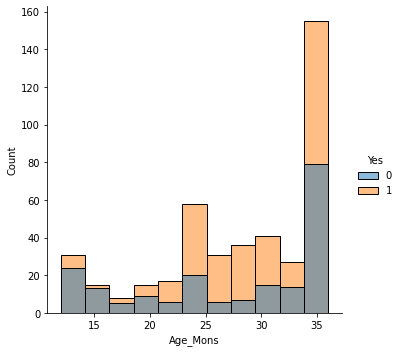

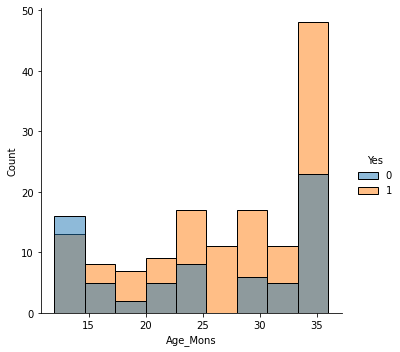

In [87]:
# Plot the age in months for both the train and test sets

Y_train_s = Y_train.squeeze()
Y_prod_s = Y_prod.squeeze()

sns.displot(x=X_train['Age_Mons'], hue=Y_train_s)
Age_mon_train = plot_to_str()

sns.displot(x=X_prod['Age_Mons'], hue=Y_prod_s)
Age_mon_test = plot_to_str()

### Create Model Card

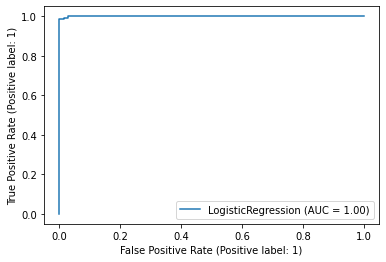

In [93]:
# Plot a ROC curve


plot_roc_curve(logreg, X_prod, Y_prod)
roc_curve_lr = plot_to_str()

#plot_roc_curve(dtfit, X_test, Y_test)
#roc_curve_dt = plot_to_str()

#plot_roc_curve(knnfit, X_test, Y_test)
#roc_curve_knn = plot_to_str()

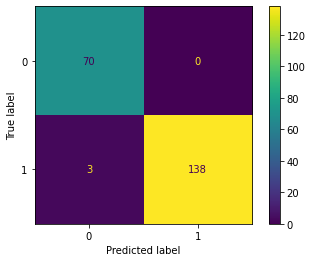

In [94]:
# Plot a confusion matrix

plot_confusion_matrix(logreg, X_prod, Y_prod)
confusion_matrix_lr = plot_to_str()

#plot_confusion_matrix(dtfit, X_test, Y_test)
#confusion_matrix_dt = plot_to_str()

#plot_confusion_matrix(knnfit, X_test, Y_test)
#confusion_matrix_knn = plot_to_str()

### Model Card for Logistic regression

In [109]:
mct = mctlib.ModelCardToolkit()

model_card = mct.scaffold_assets()

### Annotate model details into model card

In [110]:
model_card.model_details.name = 'Autism Screening Dataset'
model_card.model_details.overview = (
    'This model predicts whether a child is autistic or not based certain factors')
model_card.model_details.owners = [
    mctlib.Owner(name= 'Model Cards Team', contact='model-cards@google.com')
]
model_card.model_details.version.name = str("Version 1.0")
model_card.model_details.version.date = str(date.today())

### Add model uses and user details, ethical considerations and limitations

In [111]:
model_card.considerations.ethical_considerations = [mctlib.Risk(
    name=('Manual selection of image sections to digitize could create '
            'selection bias'),
    mitigation_strategy='Automate the selection process'
)]
model_card.considerations.limitations = [mctlib.Limitation(description='Autism diagnosis')]
model_card.considerations.use_cases = [mctlib.UseCase(description='Autism diagnosis')]
model_card.considerations.users = [mctlib.User(description='Medical professionals'), mctlib.User(description='ML researchers')]

### Add training and test dataset details

In [112]:
model_card.model_parameters.data.append(mctlib.Dataset(name="Training Dataset"))
model_card.model_parameters.data[0].graphics.description = (
  f'{len(X_train)} rows with {len(X_train.columns)} features')
model_card.model_parameters.data[0].graphics.collection =[
    mctlib.Graphic(image=Age_mon_train)
]
model_card.model_parameters.data.append(mctlib.Dataset(name="Production Dataset"))
model_card.model_parameters.data[1].graphics.description = (
  f'{len(X_prod)} rows with {len(X_prod.columns)} features')
model_card.model_parameters.data[1].graphics.collection =[
    mctlib.Graphic(image=Age_mon_test)
]

### Add Model Evaluation Details


In [113]:
model_card.quantitative_analysis.graphics.description = (
  'ROC curve and confusion matrix for Logistic Regression')
model_card.quantitative_analysis.graphics.collection = [
    mctlib.Graphic(image=roc_curve_lr),
    mctlib.Graphic(image=confusion_matrix_lr),
]

In [114]:
mct.update_model_card(model_card)

### Generate Model Card for Logistic Regression




In [115]:
# Return the model card document as an HTML page

html = mct.export_format(output_file='/mnt/demo_cardv5.html')

In [116]:
display.display(display.HTML(html))